In [2]:
import cPickle as pk
p = pk.load(open('populations.p', 'rb'))
i = pk.load(open('interventions.p', 'rb'))
o = pk.load(open('outcomes.p', 'rb'))

Using TensorFlow backend.


In [3]:
import vectorizer

In [4]:
len(p.word2idx), len(i.word2idx), len(o.word2idx)

(37768, 44644, 31781)

In [5]:
bow_p = p.texts_to_BoW(p.fit_texts)

In [6]:
bow_i = i.texts_to_BoW(i.fit_texts)
bow_o = o.texts_to_BoW(o.fit_texts)

In [7]:
bow_p.shape, bow_i.shape, bow_o.shape

((41784, 37768), (41784, 44644), (41784, 31781))

In [8]:
from sklearn.decomposition import TruncatedSVD

In [9]:
svd_p = TruncatedSVD(n_components=100).fit_transform(bow_p)

In [10]:
svd_i = TruncatedSVD(n_components=100).fit_transform(bow_i)
svd_o = TruncatedSVD(n_components=100).fit_transform(bow_o)

In [12]:
from sklearn.manifold import TSNE
tsne_p = TSNE(n_components=2).fit_transform(svd_p[:1000, :])
tsne_i = TSNE(n_components=2).fit_transform(svd_i[:1000, :])
tsne_o = TSNE(n_components=2).fit_transform(svd_o[:1000, :])

In [13]:
import matplotlib.pyplot as plt

In [16]:
plt.scatter(tsne_p[:, 0], tsne_p[:, 1])
plt.scatter(tsne_i[:, 0], tsne_i[:, 1])
plt.scatter(tsne_o[:, 0], tsne_o[:, 1])

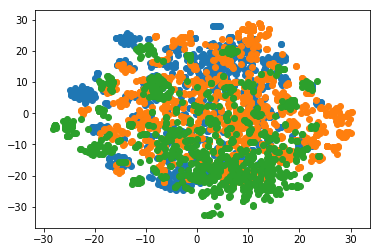

In [17]:
plt.show()

In [18]:
len(set(p.word2idx.keys()) & set(i.word2idx.keys()))

18029

In [1]:
import cPickle
vec = cPickle.load(open('allfields.p', 'rb'))

Using TensorFlow backend.


In [3]:
print(vec.maxlen)
print(vec.vocab_size)

336
117741


In [4]:
len(vec.word2idx)

117741